In [1]:
import importlib
import sys
import os
sys.path.append(os.path.abspath("src"))
import neural_network
import normalizer
importlib.reload(neural_network)
importlib.reload(normalizer)
from neural_network import NeuralNetwork
from normalizer import Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regression
importlib.reload(regression)
from regression import *

### Momentum
```python

Theta = initialize_randomly()
Momentum = np.zeros_like(Theta)
learning_rate = eta
momentum_factor = lambda_value

while not stop_condition():
    Delta_Theta = np.zeros_like(Theta)
    
    for X, Y in training_set:
        Y_hat = Network(Theta, X)
        Delta_Theta -= gradient(Network, Theta, X, Y)
    
    Momentum = Delta_Theta + Momentum * momentum_factor
    Theta += learning_rate * Momentum

```

### RMSprop

adjusts the learning rate for each parameter based on the moving average of squared gradients

1. **Compute the moving average of squared gradients:**
   $$E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2$$

2. **Update the parameter:**
   $$\theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t$$

where:
- $E[g^2]_t$ is the moving average of squared gradients,
- $g_t$ is the current gradient,
- $\beta$ (e.g., 0.9) is the smoothing coefficient,
- $\epsilon$ is a small constant to prevent division by zero.




### Square large dataset
MSE<1

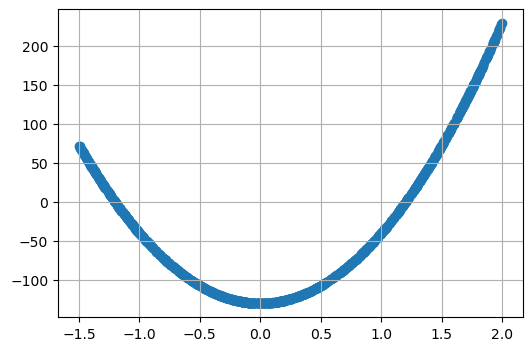

In [43]:
square_large_training_path='data/square-large-training.csv'
square_large_test_path='data/square-large-test.csv'

X_train_square_large, Y_train_square_large, X_test_square_large, Y_test_square_large=load_data(square_large_training_path, square_large_test_path)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_square_large, Y_train_square_large)

In [57]:
normalizer_square_large = Normalizer()
X_train_square_large_normalized, Y_train_square_large_normalized = normalizer_square_large.fit_transform(X_train_square_large, Y_train_square_large)
X_test_square_large_normalized, Y_test_square_large_normalized = normalizer_square_large.transform(X_test_square_large, Y_test_square_large)

Epoch 0, Training Loss: 0.095368, Test Loss: 0.154571
Epoch 100, Training Loss: 0.000454, Test Loss: 0.003134
Epoch 200, Training Loss: 0.000170, Test Loss: 0.001368
Epoch 300, Training Loss: 0.000092, Test Loss: 0.000703
Epoch 400, Training Loss: 0.000034, Test Loss: 0.000318
Epoch 500, Training Loss: 0.000023, Test Loss: 0.000159
Epoch 600, Training Loss: 0.000007, Test Loss: 0.000088
Epoch 700, Training Loss: 0.000004, Test Loss: 0.000042
Epoch 800, Training Loss: 0.000004, Test Loss: 0.000028
Epoch 900, Training Loss: 0.000001, Test Loss: 0.000020
Epoch 1000, Training Loss: 0.000001, Test Loss: 0.000015
Epoch 1100, Training Loss: 0.000002, Test Loss: 0.000013
Epoch 1200, Training Loss: 0.000002, Test Loss: 0.000013
Epoch 1300, Training Loss: 0.000001, Test Loss: 0.000010
Epoch 1400, Training Loss: 0.000001, Test Loss: 0.000012
Epoch 1500, Training Loss: 0.000001, Test Loss: 0.000011
Epoch 1600, Training Loss: 0.000001, Test Loss: 0.000011
Epoch 1700, Training Loss: 0.000001, Test L

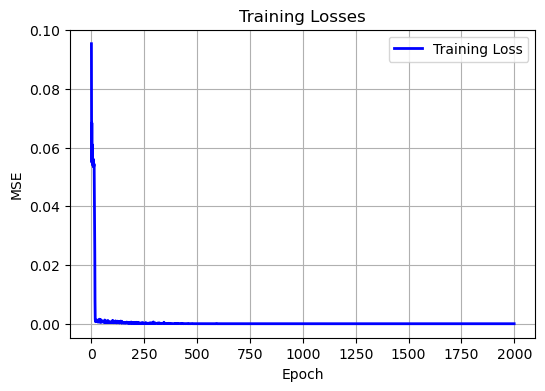

In [483]:
nn_square_large = NeuralNetwork(layers=[1, 20 ,1], learning_rate=0.2, activation='tanh',weights_initialize="Xavier" )

nn_square_large.train(X_train_square_large_normalized, Y_train_square_large_normalized, 
                       X_test_square_large_normalized, Y_test_square_large_normalized, 
                       epochs=2000, batch_size=32, verbose_interval=100, 
                       optimizer="momentum", momentum_coeff=0.9)

In [484]:
Y_pred_denorm=normalizer_square_large.denormalize_Y(nn_square_large.predict(X_test_square_large_normalized))
mse = np.mean((Y_pred_denorm - Y_test_square_large) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1.6607273964391172


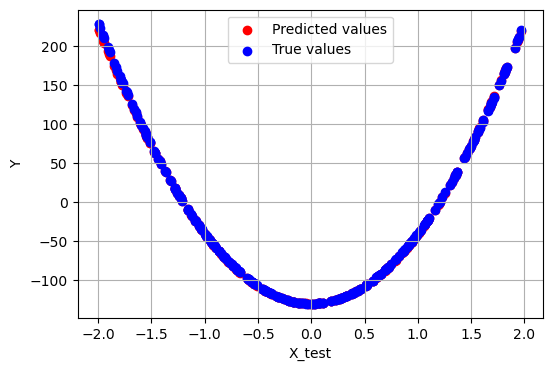

In [485]:
plot_fitted_vs_actual(X_test_square_large, Y_test_square_large, Y_pred_denorm, "test")

### Steps large dataset
MSE<3

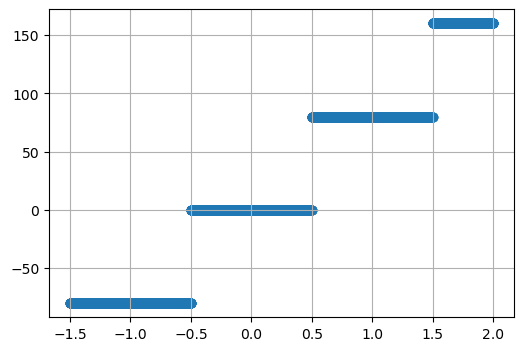

In [4]:
steps_large_training_path='data/steps-large-training.csv'
steps_large_test_path='data/steps-large-test.csv'

X_train_steps_large, Y_train_steps_large, X_test_steps_large, Y_test_steps_large=load_data(steps_large_training_path, steps_large_test_path)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_steps_large, Y_train_steps_large)

Epoch 0, Training Loss: 7108.241478, Test Loss: 7180.779846
Epoch 100, Training Loss: 742.236905, Test Loss: 763.883477
Epoch 200, Training Loss: 212.364670, Test Loss: 217.630464
Epoch 300, Training Loss: 36.710491, Test Loss: 36.476646
Epoch 400, Training Loss: 19.270631, Test Loss: 26.657520
Epoch 500, Training Loss: 10.615562, Test Loss: 10.232178
Epoch 600, Training Loss: 7.876524, Test Loss: 6.467544
Epoch 700, Training Loss: 19.900324, Test Loss: 16.271693
Epoch 800, Training Loss: 5.740150, Test Loss: 4.029733
Epoch 900, Training Loss: 24.722452, Test Loss: 18.157143
Epoch 1000, Training Loss: 15.722215, Test Loss: 18.034438
Epoch 1100, Training Loss: 7.724102, Test Loss: 10.881526
Epoch 1200, Training Loss: 7.369167, Test Loss: 1.525622
Epoch 1300, Training Loss: 16.554188, Test Loss: 9.544588
Epoch 1400, Training Loss: 7.074937, Test Loss: 5.407558
Epoch 1500, Training Loss: 8.141784, Test Loss: 2.641413
Epoch 1600, Training Loss: 8.195128, Test Loss: 3.642450
Epoch 1700, Tra

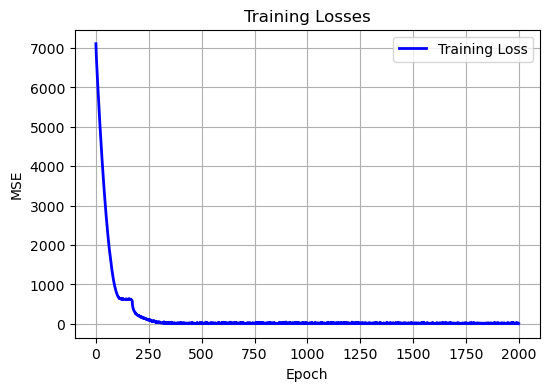

In [361]:
nn_steps_large = NeuralNetwork(layers=[1,5,5,5,5,1], learning_rate=0.001, activation='tanh', weights_initialize='Xavier')

nn_steps_large.train(X_train_steps_large, Y_train_steps_large, 
                     X_test_steps_large, Y_test_steps_large, 
                     batch_size=64, epochs=2000, verbose_interval=100,
                     optimizer="RMSprop", beta=0.9)

In [362]:
Y_pred=nn_steps_large.predict(X_test_steps_large)
mse = np.mean((Y_pred - Y_test_steps_large) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 3.237246925371508


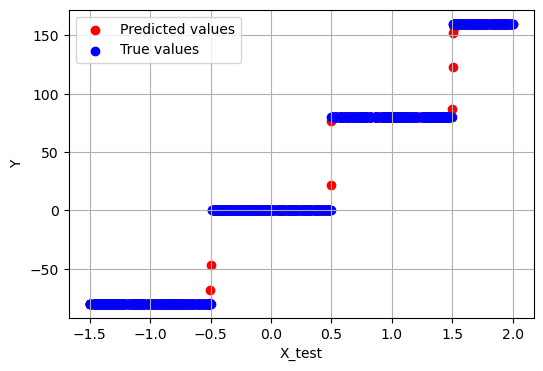

In [363]:
plot_fitted_vs_actual(X_test_steps_large, Y_test_steps_large, Y_pred, "test")

### Multimodal large dataset
MSE<9

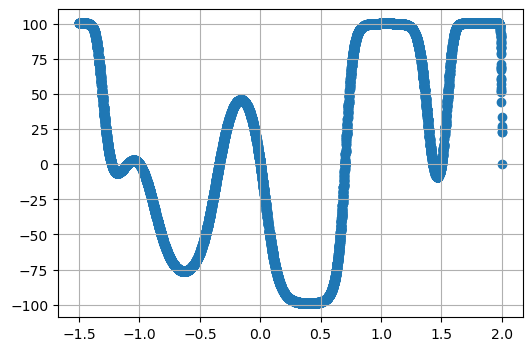

In [2]:
multimodal_large_training_path='data//multimodal-large-training.csv'
multimodal_large_test_path='data/multimodal-large-test.csv'

X_train_multimodal_large, Y_train_multimodal_large, X_test_multimodal_large, Y_test_multimodal_large=load_data(multimodal_large_training_path, multimodal_large_test_path, index_col=None)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_multimodal_large, Y_train_multimodal_large)

In [3]:
normalizer_multimodal_large = Normalizer()
X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized = normalizer_multimodal_large.fit_transform(X_train_multimodal_large, Y_train_multimodal_large)
X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized = normalizer_multimodal_large.transform(X_test_multimodal_large, Y_test_multimodal_large)

Epoch 0, Training Loss: 0.046315, Test Loss: 0.045920
Epoch 100, Training Loss: 0.000659, Test Loss: 0.000590
Epoch 200, Training Loss: 0.000373, Test Loss: 0.000298
Epoch 300, Training Loss: 0.000396, Test Loss: 0.000318
Epoch 400, Training Loss: 0.000761, Test Loss: 0.000705
Epoch 500, Training Loss: 0.000508, Test Loss: 0.000385
Epoch 600, Training Loss: 0.000333, Test Loss: 0.000217
Epoch 700, Training Loss: 0.000379, Test Loss: 0.000356
Epoch 800, Training Loss: 0.000321, Test Loss: 0.000255
Epoch 900, Training Loss: 0.000224, Test Loss: 0.000155
Epoch 1000, Training Loss: 0.000409, Test Loss: 0.000274
Epoch 1100, Training Loss: 0.000692, Test Loss: 0.000677
Epoch 1200, Training Loss: 0.000599, Test Loss: 0.000501
Epoch 1300, Training Loss: 0.000264, Test Loss: 0.000151
Epoch 1400, Training Loss: 0.000333, Test Loss: 0.000251
Total training time: 903.24 seconds


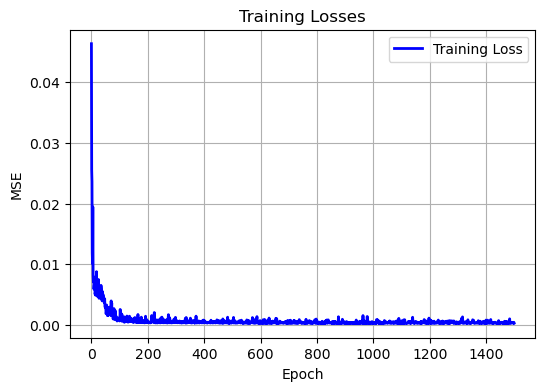

In [144]:
nn_multimodal_large = NeuralNetwork(layers=[1, 20,20, 1], learning_rate=0.1, activation='relu',weights_initialize='He')
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=1500, verbose_interval=100,
                          optimizer="momentum", momentum_coeff=0.9)

In [147]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 7.444110746335695


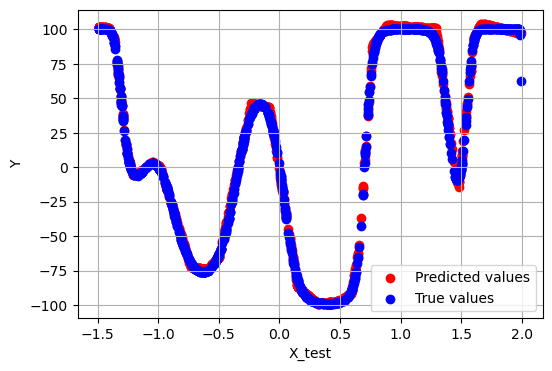

In [148]:
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

### SGD, Momentum, RMSprop comparison


In [348]:
def plot_training_losses_for_optimizers(nn_sgd, nn_momentum, nn_rmsprop):
    nn_sgd_train_losses=nn_sgd['train_losses']
    nn_momentum_train_losses=nn_momentum['train_losses']
    nn_RMSprop_train_losses=nn_rmsprop['train_losses']

    min_len = min(len(nn_sgd_train_losses), len(nn_momentum_train_losses), len(nn_RMSprop_train_losses))

    sgd_losses = nn_sgd_train_losses[:min_len]
    momentum_losses = nn_momentum_train_losses[:min_len]
    rmsprop_losses = nn_RMSprop_train_losses[:min_len]

    fig, ax = plt.subplots(1, 3, figsize=(10, 4))

    y_min = min(min(sgd_losses), min(momentum_losses), min(rmsprop_losses))
    y_max = max(max(sgd_losses), max(momentum_losses), max(rmsprop_losses))

    ax[0].plot(range(min_len), sgd_losses, label="SGD", color="blue")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("MSE Loss")
    ax[0].set_title("SGD Training")
    ax[0].grid(True)
    ax[0].set_ylim(y_min, y_max)


    ax[1].plot(range(min_len),momentum_losses, label="Momentum", color="green")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("MSE Loss")
    ax[1].set_title("Momentum Training")
    ax[1].grid(True)
    ax[1].set_ylim(y_min, y_max)

    ax[2].plot(range(min_len), rmsprop_losses, label="RMSprop", color="purple")
    ax[2].set_xlabel("Epochs")
    ax[2].set_ylabel("MSE Loss")
    ax[2].set_title("RMSprop Training")
    ax[2].grid(True)
    ax[2].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

#### square large dataset

Epoch 0, Training Loss: 0.064899, Test Loss: 0.163752
Epoch 100, Training Loss: 0.000164, Test Loss: 0.001547
Epoch 200, Training Loss: 0.000050, Test Loss: 0.000831
Epoch 300, Training Loss: 0.000030, Test Loss: 0.000588
Epoch 400, Training Loss: 0.000024, Test Loss: 0.000477
Epoch 500, Training Loss: 0.000018, Test Loss: 0.000414
Epoch 600, Training Loss: 0.000049, Test Loss: 0.000412
Epoch 700, Training Loss: 0.000018, Test Loss: 0.000340
Epoch 800, Training Loss: 0.000012, Test Loss: 0.000298
Epoch 900, Training Loss: 0.000012, Test Loss: 0.000265
Epoch 1000, Training Loss: 0.000013, Test Loss: 0.000247
Epoch 1100, Training Loss: 0.000012, Test Loss: 0.000232
Epoch 1200, Training Loss: 0.000009, Test Loss: 0.000209
Epoch 1300, Training Loss: 0.000011, Test Loss: 0.000199
Epoch 1400, Training Loss: 0.000015, Test Loss: 0.000184
Epoch 1500, Training Loss: 0.000008, Test Loss: 0.000178
Epoch 1600, Training Loss: 0.000008, Test Loss: 0.000164
Epoch 1700, Training Loss: 0.000010, Test L

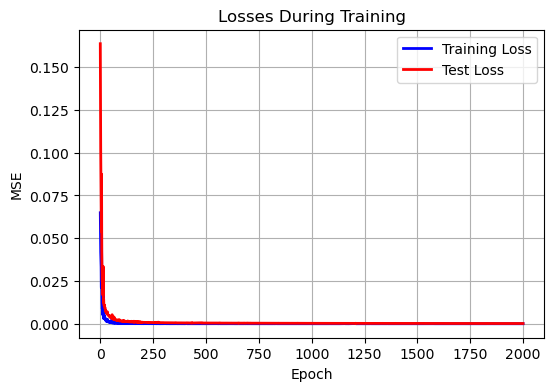

In [235]:
nn_sgd_square_large=NeuralNetwork(layers=[1,40,1],  activation="relu", weights_initialize="He")
nn_sgd_square_large_stats=nn_sgd_square_large.train(X_train_square_large_normalized, Y_train_square_large_normalized, 
                          X_test_square_large_normalized, Y_test_square_large_normalized,
                          batch_size=32, epochs=2000, verbose=True, verbose_interval=100, plot_training_loss=True,
                          learning_rate=0.1, optimizer="GD", return_training_stats=True, early_stopping=True, patience=100)   

In [237]:
Y_pred_denorm=normalizer_square_large.denormalize_Y(nn_sgd_square_large.predict(X_test_square_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_square_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 17.032017387923624


Epoch 0, Training Loss: 0.015739, Test Loss: 0.016178
Epoch 10, Training Loss: 0.000084, Test Loss: 0.000071
Epoch 20, Training Loss: 0.000033, Test Loss: 0.000039
Epoch 30, Training Loss: 0.000024, Test Loss: 0.000052
Epoch 40, Training Loss: 0.000019, Test Loss: 0.000075
Epoch 50, Training Loss: 0.000014, Test Loss: 0.000090
Epoch 60, Training Loss: 0.000011, Test Loss: 0.000110
Epoch 70, Training Loss: 0.000009, Test Loss: 0.000128
Epoch 80, Training Loss: 0.000010, Test Loss: 0.000134
Epoch 90, Training Loss: 0.000008, Test Loss: 0.000152
Epoch 100, Training Loss: 0.000009, Test Loss: 0.000152
Epoch 110, Training Loss: 0.000007, Test Loss: 0.000156
Early stopping due to no improvment in test loss after 100 epochs


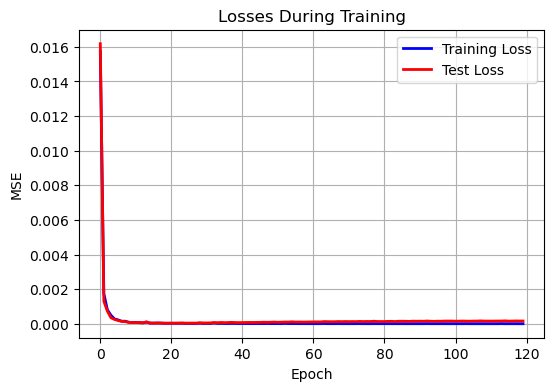

In [286]:
nn_momentum_square_large=NeuralNetwork(layers=[1,30, 30, 1], activation="relu", weights_initialize="He")
nn_momentum_square_large_stats=nn_momentum_square_large.train(X_train_square_large_normalized, Y_train_square_large_normalized, 
                          X_test_square_large_normalized, Y_test_square_large_normalized,
                          batch_size=32, epochs=2000,  plot_training_loss=True,
                          learning_rate=0.1, optimizer="momentum", momentum_coeff=0.9, verbose=True, verbose_interval=10,
                          return_training_stats=True, early_stopping=True, patience=100)    

In [287]:
Y_pred_denorm=normalizer_square_large.denormalize_Y(nn_momentum_square_large.predict(X_test_square_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_square_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 4.760858087762517


Epoch 0, Training Loss: 0.013885, Test Loss: 0.015877
Epoch 100, Training Loss: 0.000137, Test Loss: 0.000986
Epoch 200, Training Loss: 0.000219, Test Loss: 0.001355
Epoch 300, Training Loss: 0.000229, Test Loss: 0.000277
Early stopping due to no improvment in test loss after 100 epochs


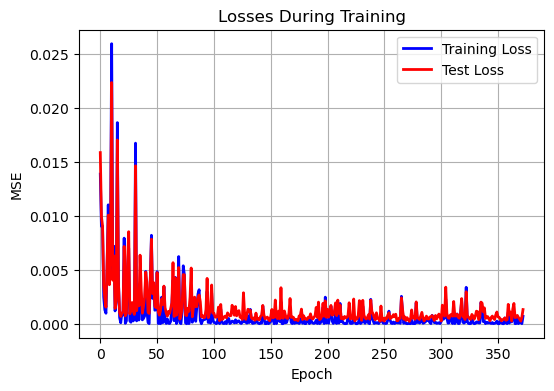

In [256]:
nn_RMSprop_square_large=NeuralNetwork(layers=[1,40,1], activation="relu", weights_initialize="He")
nn_RMSprop_square_large_stats=nn_RMSprop_square_large.train(X_train_square_large_normalized, Y_train_square_large_normalized, 
                          X_test_square_large_normalized, Y_test_square_large_normalized,
                          batch_size=32, epochs=2000, verbose=True, verbose_interval=100, plot_training_loss=True,
                          learning_rate=0.01, optimizer="RMSprop", beta=0.9, return_training_stats=True, early_stopping=True, patience=100)  

In [258]:
Y_pred_denorm=normalizer_square_large.denormalize_Y(nn_RMSprop_square_large.predict(X_test_square_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_square_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 30.951079968634847


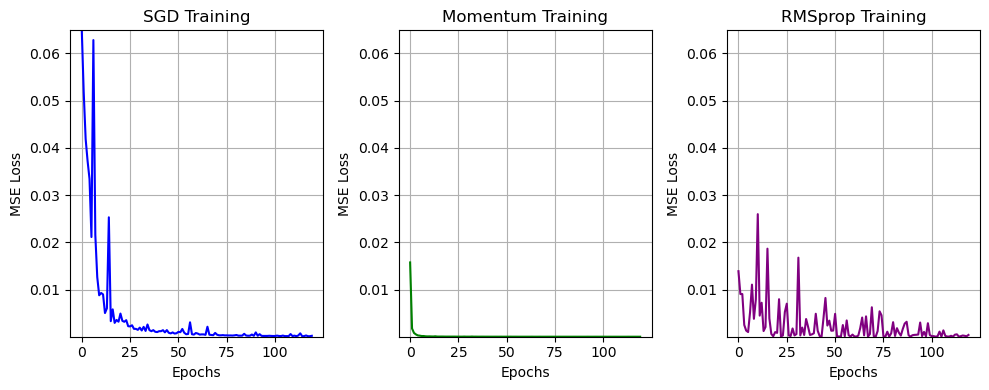

In [350]:
plot_training_losses_for_optimizers(nn_sgd_square_large_stats, nn_momentum_square_large_stats, nn_RMSprop_square_large_stats)

#### steps large dataset

Epoch 0, Training Loss: 1191.732829, Test Loss: 1234.441894
Epoch 10, Training Loss: 231.295929, Test Loss: 208.174086
Epoch 20, Training Loss: 1093.457222, Test Loss: 1058.361080
Epoch 30, Training Loss: 177.822462, Test Loss: 126.999593
Epoch 40, Training Loss: 72.834721, Test Loss: 70.508423
Epoch 50, Training Loss: 60.988047, Test Loss: 57.162232
Epoch 60, Training Loss: 144.592076, Test Loss: 190.954550
Epoch 70, Training Loss: 537.268246, Test Loss: 573.761500
Epoch 80, Training Loss: 75.620612, Test Loss: 67.313951
Epoch 90, Training Loss: 62.033669, Test Loss: 50.963576
Epoch 100, Training Loss: 69.909582, Test Loss: 91.016368
Epoch 110, Training Loss: 40.889283, Test Loss: 26.116284
Epoch 120, Training Loss: 62.217564, Test Loss: 55.756500
Early stopping due to no improvment in test loss after 50 epochs


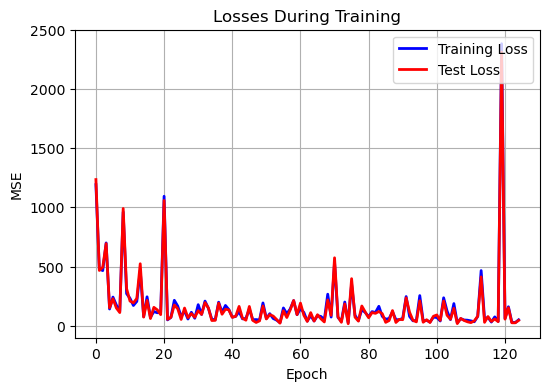

In [308]:
nn_sgd_steps_large=NeuralNetwork(layers=[1,20,20,20,1], activation="relu", weights_initialize="He")
nn_sgd_steps_large_stats=nn_sgd_steps_large.train(X_train_steps_large, Y_train_steps_large, 
                          X_test_steps_large, Y_test_steps_large,
                          batch_size=32, epochs=2000, verbose=True, verbose_interval=10, plot_training_loss=True,
                          learning_rate=0.001, optimizer="GD", return_training_stats=True, early_stopping=True, patience=50) 

Mean Squared Error (MSE): 16.94874291612556


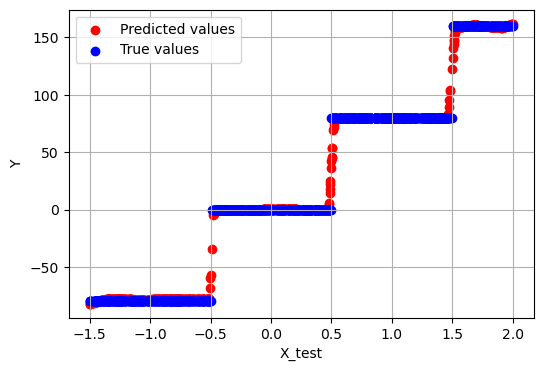

In [309]:
Y_pred=nn_sgd_steps_large.predict(X_test_steps_large)
mse = np.mean((Y_pred - Y_test_steps_large) ** 2)
print(f'Mean Squared Error (MSE): {mse}')
plot_fitted_vs_actual(X_test_steps_large, Y_test_steps_large, Y_pred, "test")

Epoch 0, Training Loss: 6831.495419, Test Loss: 6887.406674
Epoch 10, Training Loss: 6829.364177, Test Loss: 6883.877948
Epoch 20, Training Loss: 6830.186902, Test Loss: 6884.097806
Epoch 30, Training Loss: 6829.337242, Test Loss: 6883.919142
Epoch 40, Training Loss: 6829.323476, Test Loss: 6883.976012
Epoch 50, Training Loss: 6829.328942, Test Loss: 6883.944213
Epoch 60, Training Loss: 6829.508864, Test Loss: 6883.833866
Epoch 70, Training Loss: 6829.329242, Test Loss: 6883.943031
Epoch 80, Training Loss: 6829.352659, Test Loss: 6884.183050
Epoch 90, Training Loss: 6830.835532, Test Loss: 6884.496625
Early stopping due to no improvment in test loss after 50 epochs


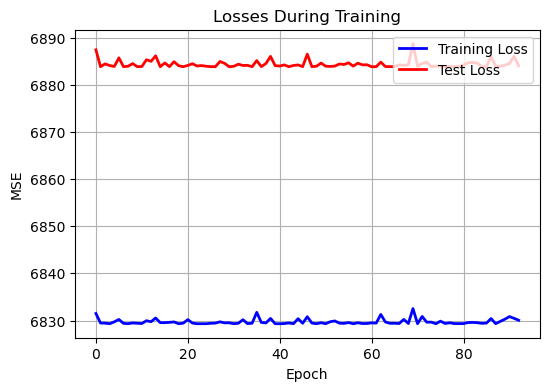

In [314]:
nn_momentum_steps_large=NeuralNetwork(layers=[1,20,20,20,1], activation="relu", weights_initialize="He")
nn_momentum_steps_large_stats=nn_momentum_steps_large.train(X_train_steps_large, Y_train_steps_large, 
                          X_test_steps_large, Y_test_steps_large,
                          batch_size=32, epochs=2000, verbose=True, verbose_interval=10, plot_training_loss=True,
                          learning_rate=0.001,optimizer="momentum", momentum_coeff=0.9, return_training_stats=True, early_stopping=True, patience=50)   

Mean Squared Error (MSE): 6883.833745628249


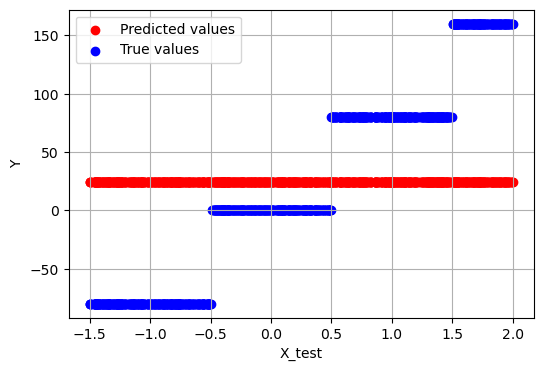

In [315]:
Y_pred=nn_momentum_steps_large.predict(X_test_steps_large)
mse = np.mean((Y_pred - Y_test_steps_large) ** 2)
print(f'Mean Squared Error (MSE): {mse}')
plot_fitted_vs_actual(X_test_steps_large, Y_test_steps_large, Y_pred, "test")

Training with momentum coefficient = 0.2
MSE for momentum coeff = 0.2: 313.68488056017395
Training with momentum coefficient = 0.5
MSE for momentum coeff = 0.5: 121.91906575839292
Training with momentum coefficient = 0.7
MSE for momentum coeff = 0.7: 6883.9851991698515
Training with momentum coefficient = 0.9
MSE for momentum coeff = 0.9: 6883.938547199955


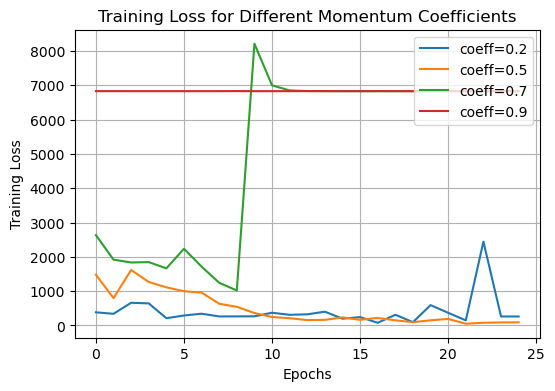

In [6]:
momentum_coeff = [0.2, 0.5, 0.7, 0.9]
results={}
nn_stat=[]
for coeff in momentum_coeff:
    print(f"Training with momentum coefficient = {coeff}")
    nn=NeuralNetwork(layers=[1,20, 20, 20, 1], activation="relu", weights_initialize="He")
    nn_stats=nn.train(X_train_steps_large, Y_train_steps_large, 
                       X_test_steps_large, Y_test_steps_large,learning_rate=0.001, 
                       batch_size=32, epochs=25, verbose=False, plot_training_loss=False,
                       optimizer="momentum", momentum_coeff=coeff, return_training_stats=True)
    results[coeff]=nn_stats['train_losses']
    nn_stat.append(nn_stats)
    print(f"MSE for momentum coeff = {coeff}: {nn.MSE(X_test_steps_large, Y_test_steps_large)}")

plt.figure(figsize=(6, 4))
for coeff, loss in results.items():
    plt.plot(loss, label=f"coeff={coeff}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss for Different Momentum Coefficients")
plt.legend(loc='upper right')
plt.grid()
plt.show()

Training with momentum coefficient = 0.2
MSE for momentum coeff = 0.2: 63.06143749411604
Training with momentum coefficient = 0.5
MSE for momentum coeff = 0.5: 691.6687083515295
Training with momentum coefficient = 0.7
MSE for momentum coeff = 0.7: 6915.055218548289
Training with momentum coefficient = 0.9
MSE for momentum coeff = 0.9: 6884.10153755993


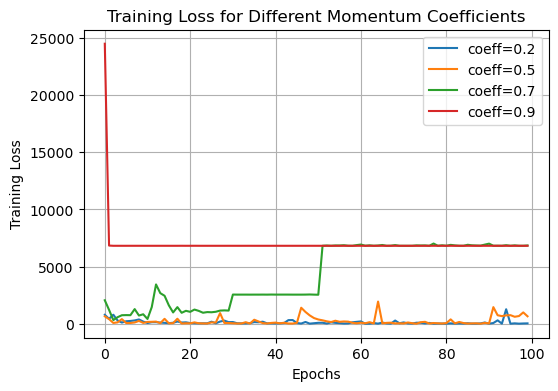

In [12]:
momentum_coeff = [0.2, 0.5, 0.7, 0.9]
results={}
nn_stat=[]
for coeff in momentum_coeff:
    print(f"Training with momentum coefficient = {coeff}")
    nn=NeuralNetwork(layers=[1,20, 20, 20, 1], activation="relu", weights_initialize="He")
    nn_stats=nn.train(X_train_steps_large, Y_train_steps_large, 
                       X_test_steps_large, Y_test_steps_large,learning_rate=0.001, 
                       batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                       optimizer="momentum", momentum_coeff=coeff, return_training_stats=True)
    results[coeff]=nn_stats['train_losses']
    nn_stat.append(nn_stats)
    print(f"MSE for momentum coeff = {coeff}: {nn.MSE(X_test_steps_large, Y_test_steps_large)}")

plt.figure(figsize=(6, 4))
for coeff, loss in results.items():
    plt.plot(loss, label=f"coeff={coeff}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss for Different Momentum Coefficients")
plt.legend(loc='upper right')
plt.grid()
plt.show()

Epoch 0, Training Loss: 345.385152, Test Loss: 363.541857
Epoch 10, Training Loss: 74.845584, Test Loss: 75.956594
Epoch 20, Training Loss: 120.474996, Test Loss: 125.028944
Epoch 30, Training Loss: 88.761222, Test Loss: 64.394654
Epoch 40, Training Loss: 83.141758, Test Loss: 94.902306
Epoch 50, Training Loss: 65.624896, Test Loss: 43.177294
Epoch 60, Training Loss: 170.299205, Test Loss: 146.108670
Early stopping due to no improvment in test loss after 20 epochs


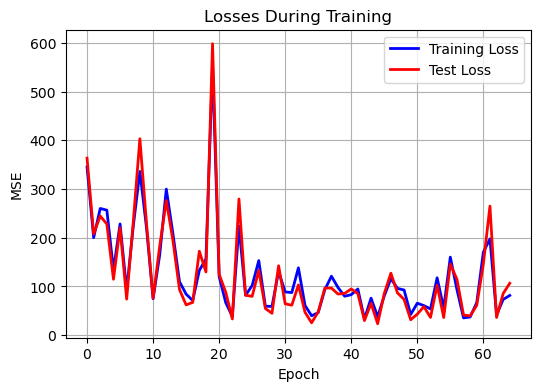

In [334]:
nn_momentum_steps_large=NeuralNetwork(layers=[1,20,20,20,1], activation="relu", weights_initialize="He")
nn_momentum_steps_large_stats=nn_momentum_steps_large.train(X_train_steps_large, Y_train_steps_large, 
                          X_test_steps_large, Y_test_steps_large,
                          batch_size=32, epochs=100, verbose=True, verbose_interval=10, plot_training_loss=True,
                          learning_rate=0.001,optimizer="momentum", momentum_coeff=0.5, return_training_stats=True, early_stopping=True, patience=20)   

Mean Squared Error (MSE): 23.496538225230726


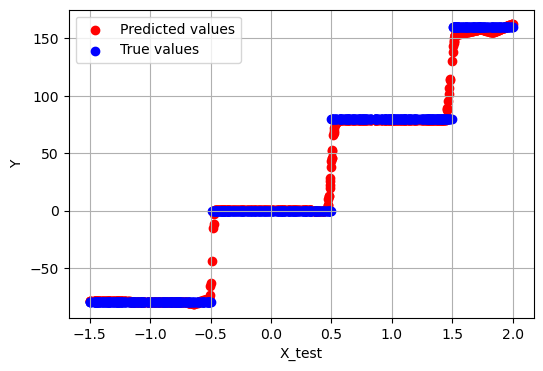

In [336]:
Y_pred=nn_momentum_steps_large.predict(X_test_steps_large)
mse = np.mean((Y_pred - Y_test_steps_large) ** 2)
print(f'Mean Squared Error (MSE): {mse}')
plot_fitted_vs_actual(X_test_steps_large, Y_test_steps_large, Y_pred, "test")

Epoch 0, Training Loss: 404.212269, Test Loss: 405.607542
Epoch 10, Training Loss: 228.521509, Test Loss: 242.496387
Epoch 20, Training Loss: 65.079028, Test Loss: 69.110227
Epoch 30, Training Loss: 74.433382, Test Loss: 89.807478
Epoch 40, Training Loss: 80.359683, Test Loss: 112.709711
Epoch 50, Training Loss: 42.187910, Test Loss: 59.248749
Epoch 60, Training Loss: 100.480290, Test Loss: 72.112706
Epoch 70, Training Loss: 52.469993, Test Loss: 50.123427
Epoch 80, Training Loss: 21.286655, Test Loss: 24.034290
Epoch 90, Training Loss: 64.086615, Test Loss: 50.199781
Epoch 100, Training Loss: 42.391859, Test Loss: 58.184519
Epoch 110, Training Loss: 19.548070, Test Loss: 17.918167
Epoch 120, Training Loss: 30.299924, Test Loss: 22.157620
Epoch 130, Training Loss: 44.224805, Test Loss: 25.184307
Epoch 140, Training Loss: 70.831232, Test Loss: 112.258968
Epoch 150, Training Loss: 45.349318, Test Loss: 30.714125
Epoch 160, Training Loss: 29.600522, Test Loss: 21.186361
Epoch 170, Trainin

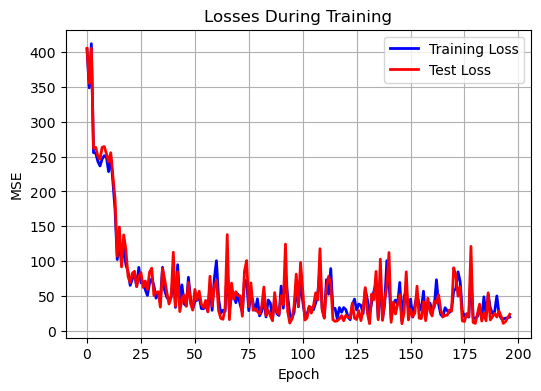

In [340]:
nn_RMSprop_steps_large=NeuralNetwork(layers=[1,20,20,20,1], activation="relu", weights_initialize="He")
nn_RMSprop_steps_large_stats=nn_RMSprop_steps_large.train(X_train_steps_large, Y_train_steps_large,  
                          X_test_steps_large, Y_test_steps_large,
                          batch_size=32, epochs=2000, verbose=True, verbose_interval=10, plot_training_loss=True,
                          learning_rate=0.005,optimizer="RMSprop", beta=0.9, return_training_stats=True, early_stopping=True, patience=50)           

Mean Squared Error (MSE): 10.019868609673523


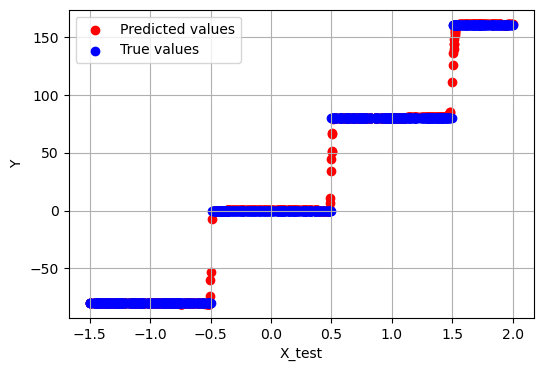

In [341]:
Y_pred=nn_RMSprop_steps_large.predict(X_test_steps_large)
mse = np.mean((Y_pred - Y_test_steps_large) ** 2)
print(f'Mean Squared Error (MSE): {mse}')
plot_fitted_vs_actual(X_test_steps_large, Y_test_steps_large, Y_pred, "test")

Training with beta = 0.2
MSE for beta = 0.2: 7.371020376106495
Training with beta = 0.5
MSE for beta = 0.5: 6.888147765114826
Training with beta = 0.7
MSE for beta = 0.7: 30.028463391854153
Training with beta = 0.9
MSE for beta = 0.9: 19.745819847743757
Training with beta = 0.99
MSE for beta = 0.99: 71.0279501255611


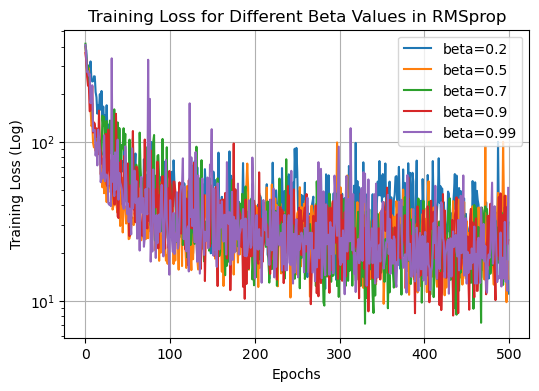

In [9]:
betas = [0.2, 0.5, 0.7, 0.9, 0.99]
results={}
for beta in betas:
    print(f"Training with beta = {beta}")
    nn=NeuralNetwork(layers=[1,20, 20, 20, 1], activation="relu", weights_initialize="He")
    nn_stats=nn.train(X_train_steps_large, Y_train_steps_large, 
                       X_test_steps_large, Y_test_steps_large,
                       learning_rate=0.005, 
                       batch_size=32, epochs=500, verbose=False, plot_training_loss=False,
                       optimizer="RMSprop", beta=beta, return_training_stats=True)
    results[beta]=nn_stats['train_losses']
    print(f"MSE for beta = {beta}: {nn.MSE(X_test_steps_large, Y_test_steps_large)}")

plt.figure(figsize=(6, 4))
for beta, loss in results.items():
    plt.plot(loss, label=f"beta={beta}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss (Log)")
plt.yscale('log')
plt.title("Training Loss for Different Beta Values in RMSprop")
plt.legend()
plt.grid()
plt.show()

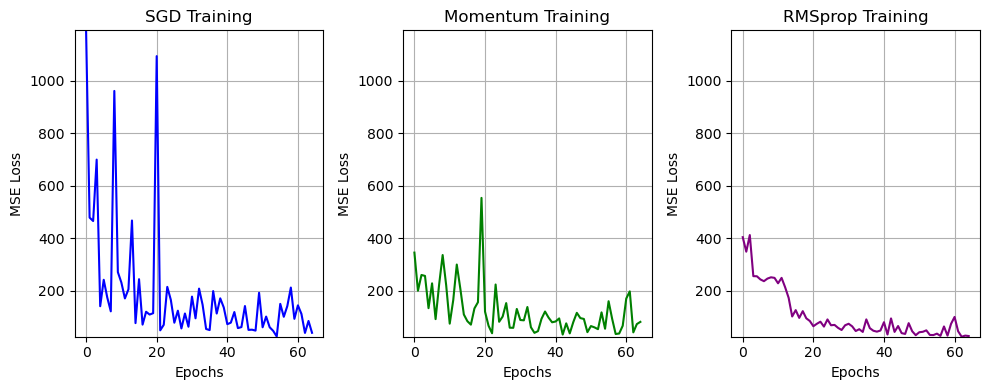

In [349]:
plot_training_losses_for_optimizers(nn_sgd_steps_large_stats, nn_momentum_steps_large_stats, nn_RMSprop_steps_large_stats)

#### multimodal large

Epoch 0, Training Loss: 0.062867, Test Loss: 0.061857
Epoch 10, Training Loss: 0.038504, Test Loss: 0.037803
Epoch 20, Training Loss: 0.017844, Test Loss: 0.018293
Epoch 30, Training Loss: 0.020864, Test Loss: 0.021430
Epoch 40, Training Loss: 0.015438, Test Loss: 0.015974
Epoch 50, Training Loss: 0.016046, Test Loss: 0.016865
Epoch 60, Training Loss: 0.012814, Test Loss: 0.013839
Epoch 70, Training Loss: 0.009780, Test Loss: 0.010468
Epoch 80, Training Loss: 0.007096, Test Loss: 0.007459
Epoch 90, Training Loss: 0.006246, Test Loss: 0.006341
Epoch 100, Training Loss: 0.009557, Test Loss: 0.009831
Epoch 110, Training Loss: 0.006485, Test Loss: 0.006742
Epoch 120, Training Loss: 0.006307, Test Loss: 0.006515
Epoch 130, Training Loss: 0.005271, Test Loss: 0.005296
Epoch 140, Training Loss: 0.005513, Test Loss: 0.005488
Epoch 150, Training Loss: 0.006715, Test Loss: 0.006730
Epoch 160, Training Loss: 0.006615, Test Loss: 0.006650
Epoch 170, Training Loss: 0.008045, Test Loss: 0.008099
Epo

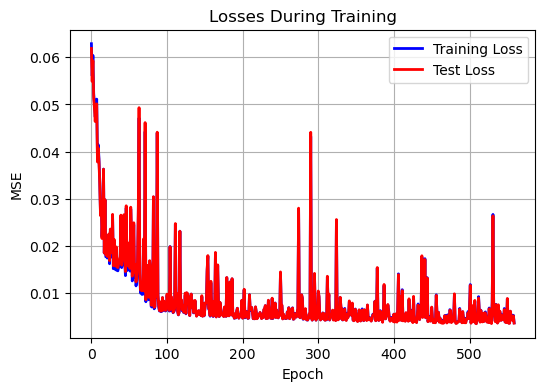

In [361]:
nn_sgd_multimodal_large=NeuralNetwork(layers=[1,20, 20, 1], activation="relu", weights_initialize="He")
nn_sgd_multimodal_large_stats=nn_sgd_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized,
                          batch_size=32, epochs=1000, verbose=True, verbose_interval=10,plot_training_loss=True,
                          learning_rate=0.1, optimizer="GD", return_training_stats=True, early_stopping=True, patience=50) 

MSE on the test set (on non-normalized data): 141.2879598399097


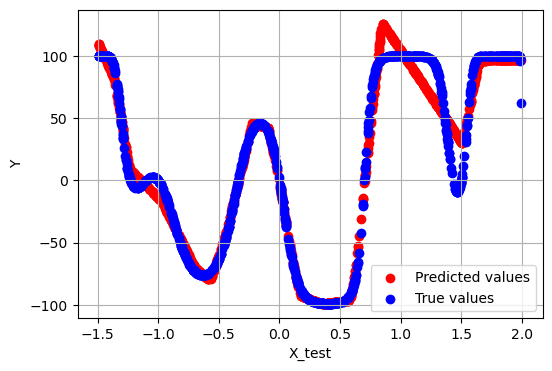

In [369]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_sgd_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

Epoch 0, Training Loss: 0.036876, Test Loss: 0.038292
Epoch 10, Training Loss: 0.010448, Test Loss: 0.011366
Epoch 20, Training Loss: 0.007028, Test Loss: 0.007346
Epoch 30, Training Loss: 0.004466, Test Loss: 0.004571
Epoch 40, Training Loss: 0.003153, Test Loss: 0.003195
Epoch 50, Training Loss: 0.002522, Test Loss: 0.002511
Epoch 60, Training Loss: 0.002666, Test Loss: 0.002479
Epoch 70, Training Loss: 0.001133, Test Loss: 0.001092
Epoch 80, Training Loss: 0.001747, Test Loss: 0.001665
Epoch 90, Training Loss: 0.000757, Test Loss: 0.000689
Epoch 100, Training Loss: 0.000511, Test Loss: 0.000443
Epoch 110, Training Loss: 0.000730, Test Loss: 0.000638
Epoch 120, Training Loss: 0.000821, Test Loss: 0.000784
Epoch 130, Training Loss: 0.000445, Test Loss: 0.000309
Epoch 140, Training Loss: 0.001326, Test Loss: 0.001140
Epoch 150, Training Loss: 0.000379, Test Loss: 0.000323
Epoch 160, Training Loss: 0.001967, Test Loss: 0.002046
Epoch 170, Training Loss: 0.000302, Test Loss: 0.000236
Epo

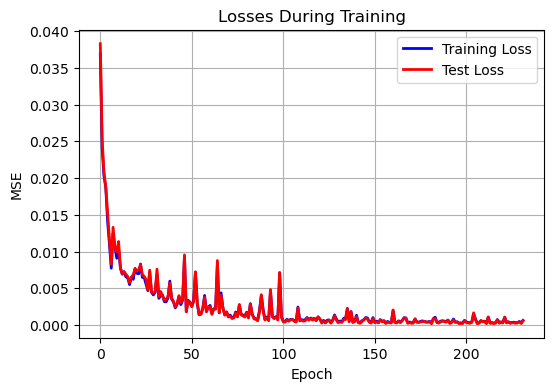

In [366]:
nn_momentum_multimodal_large=NeuralNetwork(layers=[1,20, 20, 1], activation="relu", weights_initialize="He")
nn_momentum_multimodal_large_stats=nn_momentum_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized,
                          batch_size=32, epochs=1000, verbose=True, verbose_interval=10,plot_training_loss=True,
                          learning_rate=0.1, optimizer="momentum", momentum_coeff=0.9, return_training_stats=True, early_stopping=True, patience=50) 

MSE on the test set (on non-normalized data): 6.875627142888087


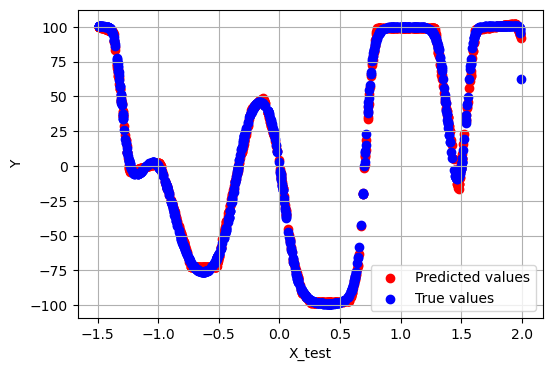

In [ ]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_momentum_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

Epoch 0, Training Loss: 0.076464, Test Loss: 0.075665
Epoch 10, Training Loss: 0.062806, Test Loss: 0.062667
Epoch 20, Training Loss: 0.152260, Test Loss: 0.150960
Epoch 30, Training Loss: 0.078330, Test Loss: 0.078645
Epoch 40, Training Loss: 0.092718, Test Loss: 0.091492
Epoch 50, Training Loss: 0.065423, Test Loss: 0.064835
Epoch 60, Training Loss: 0.104830, Test Loss: 0.105323
Epoch 70, Training Loss: 0.069125, Test Loss: 0.068291
Epoch 80, Training Loss: 0.066888, Test Loss: 0.066665
Epoch 90, Training Loss: 0.096609, Test Loss: 0.095637
Epoch 100, Training Loss: 0.066040, Test Loss: 0.066450
Epoch 110, Training Loss: 0.121043, Test Loss: 0.121529
Epoch 120, Training Loss: 0.064895, Test Loss: 0.064638
Epoch 130, Training Loss: 0.147598, Test Loss: 0.146470
Epoch 140, Training Loss: 0.169806, Test Loss: 0.170217
Early stopping due to no improvment in test loss after 50 epochs


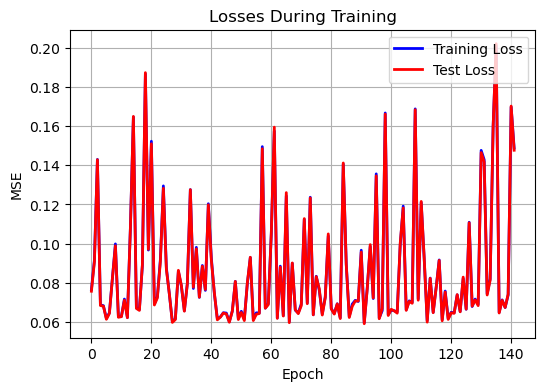

In [370]:
nn_RMSprop_multimodal_large=NeuralNetwork(layers=[1,20, 20, 1], activation="relu", weights_initialize="He")
nn_RMSprop_multimodal_large_stats=nn_RMSprop_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized,
                          batch_size=32, epochs=1000, verbose=True, verbose_interval=10,plot_training_loss=True,
                          learning_rate=0.1, optimizer="RMSprop", beta=0.9, return_training_stats=True, early_stopping=True, patience=50) 

MSE on the test set (on non-normalized data): 2346.878594807295


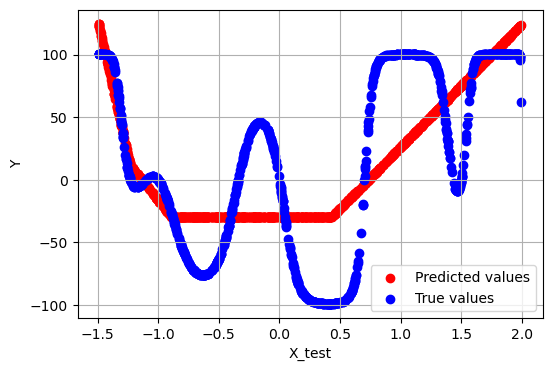

In [373]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_RMSprop_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

Training with beta = 0.2
MSE for beta = 0.2: 5103.284739657389
Training with beta = 0.5
MSE for beta = 0.5: 2528.9885263952538
Training with beta = 0.7
MSE for beta = 0.7: 2201.2703855234777
Training with beta = 0.9
MSE for beta = 0.9: 5232.712855408978
Training with beta = 0.99
MSE for beta = 0.99: 6305.939890851251


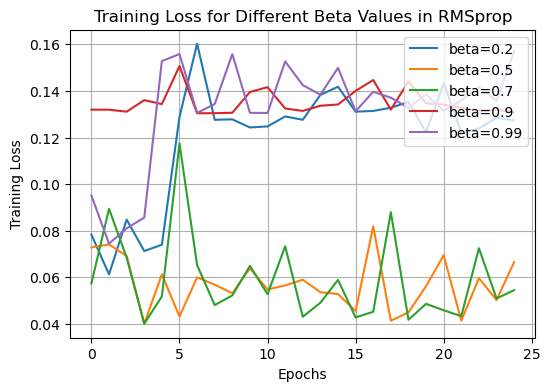

In [375]:
np.random.seed(42)

betas = [0.2, 0.5, 0.7, 0.9, 0.99]
results={}
for beta in betas:
    print(f"Training with beta = {beta}")
    nn=NeuralNetwork(layers=[1,20, 20, 20, 1], activation="relu", weights_initialize="He")
    nn_stats=nn.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                       X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized,
                       learning_rate=0.1, 
                       batch_size=32, epochs=25, verbose=False, plot_training_loss=False,
                       optimizer="RMSprop", beta=beta, return_training_stats=True)
    results[beta]=nn_stats['train_losses']
    Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn.predict(X_test_multimodal_large_normalized))
    mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
    print(f"MSE for beta = {beta}: {mse_test}")

plt.figure(figsize=(6, 4))
for beta, loss in results.items():
    plt.plot(loss, label=f"beta={beta}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss for Different Beta Values in RMSprop")
plt.legend(loc='upper right')
plt.grid()
plt.show()

Epoch 0, Training Loss: 0.042955, Test Loss: 0.042374
Epoch 10, Training Loss: 0.014270, Test Loss: 0.014807
Epoch 20, Training Loss: 0.005146, Test Loss: 0.005401
Epoch 30, Training Loss: 0.005855, Test Loss: 0.005806
Epoch 40, Training Loss: 0.003803, Test Loss: 0.003992
Epoch 50, Training Loss: 0.003654, Test Loss: 0.003835
Epoch 60, Training Loss: 0.001181, Test Loss: 0.001090
Epoch 70, Training Loss: 0.005592, Test Loss: 0.005201
Epoch 80, Training Loss: 0.002339, Test Loss: 0.002100
Epoch 90, Training Loss: 0.005168, Test Loss: 0.004744
Epoch 100, Training Loss: 0.002590, Test Loss: 0.002147
Epoch 110, Training Loss: 0.002023, Test Loss: 0.001883
Epoch 120, Training Loss: 0.004190, Test Loss: 0.004217
Epoch 130, Training Loss: 0.004508, Test Loss: 0.004101
Early stopping due to no improvment in test loss after 50 epochs


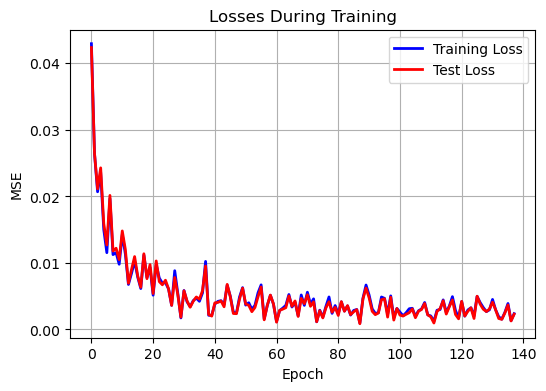

In [8]:
nn_RMSprop_multimodal_large=NeuralNetwork(layers=[1,20, 20, 1], activation="relu", weights_initialize="He")
nn_RMSprop_multimodal_large_stats=nn_RMSprop_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized,
                          batch_size=32, epochs=1000, verbose=True, verbose_interval=10,plot_training_loss=True,
                          learning_rate=0.01, optimizer="RMSprop", beta=0.5, return_training_stats=True, early_stopping=True, patience=50) 

MSE on the test set (on non-normalized data): 34.05177631485369


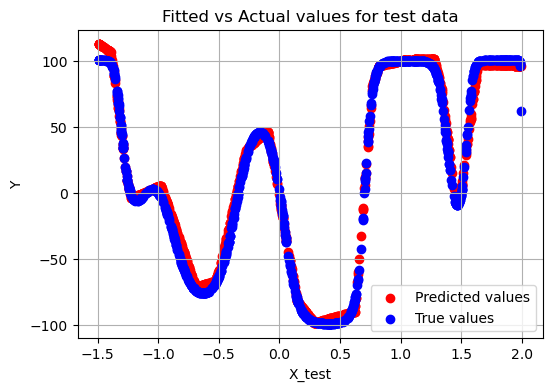

In [16]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_RMSprop_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

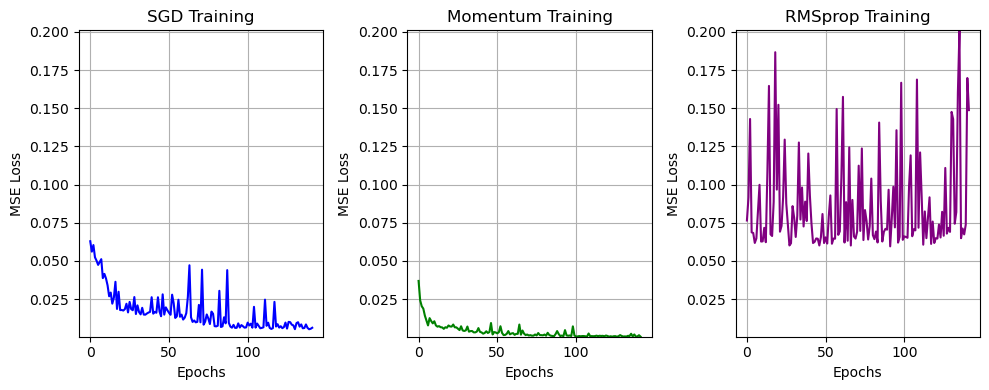

In [376]:
plot_training_losses_for_optimizers(nn_sgd_multimodal_large_stats, nn_momentum_multimodal_large_stats, nn_RMSprop_multimodal_large_stats)

### Trying different momentum coefficients for Momentum and betas for RMSprop

In [424]:
X = np.linspace(-10, 10, 500).reshape(-1, 1)
Y = 0.5 * X**2 + 3 * X + 10 + np.random.normal(0, 10, size=X.shape) #quadratic with noise
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, Y_train, X_test, Y_test = X[:split_index], Y[:split_index], X[split_index:], Y[split_index:]

normalizer=Normalizer()
X_train_normalized, Y_train_normalized = normalizer.fit_transform(X_train, Y_train)
X_test_normalized, Y_test_normalized = normalizer.transform(X_test, Y_test)

Training with momentum coefficient = 0.5
Total training time: 0.12 seconds
MSE for momentum coeff = 0.5: 0.08131862630499506
Training with momentum coefficient = 0.7
Total training time: 0.10 seconds
MSE for momentum coeff = 0.7: 0.08272265178215213
Training with momentum coefficient = 0.9
Total training time: 0.11 seconds
MSE for momentum coeff = 0.9: 0.4189592881003489
Training with momentum coefficient = 0.99
Total training time: 0.11 seconds
MSE for momentum coeff = 0.99: 0.1969267962626623


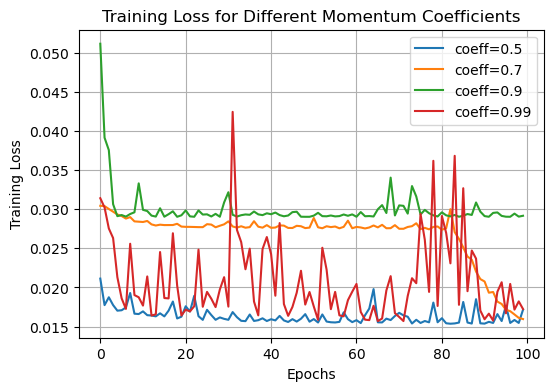

In [440]:
np.random.seed(42)

momentum_coeff = [0.5, 0.7, 0.9, 0.99]
results={}
for coeff in momentum_coeff:
    print(f"Training with momentum coefficient = {coeff}")
    nn=NeuralNetwork(layers=[1,5,5,1], learning_rate=0.1, activation="relu", weights_initialize="He")
    nn.train(X_train_normalized, Y_train_normalized, 
                       X_test_normalized, Y_test_normalized,
                       batch_size=32, epochs=100, verbose=False, plot_training_loss=False,
                       optimizer="momentum", momentum_coeff=coeff)
    results[coeff]=nn.train_losses
    print(f"MSE for momentum coeff = {coeff}: {nn.MSE(X_test_normalized, Y_test_normalized)}")

plt.figure(figsize=(6, 4))
for coeff, loss in results.items():
    plt.plot(loss, label=f"coeff={coeff}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss for Different Momentum Coefficients")
plt.legend(loc='upper right')
plt.grid()
plt.show()